In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

plt.rcParams['axes.linewidth'] = 2.0

In [164]:
def simpson(integrand,x_i,x_f,N_bins):
    h_step=np.float32((x_f-x_i)/N_bins)
    if N_bins%2!=0:
        raise ValueError("Simpson's Rule requires an even number of bins, but you have specified a non-even number of bins.")
    sum = 0

    for i in range(np.int32(N_bins/2)):
        sum += 4*integrand((2*i+1)*h_step + x_i)

    for i in range(np.int32((N_bins/2) - 1)):
        sum += 2*integrand((2*i+2)*h_step + x_i)
        
    sum += integrand(x_f) + integrand(x_i)
    return sum*(h_step/3)

def correlation_func(r, pk_spline, k_cutoff, nbins):
    epsilon = 1e-5
    integrand = lambda k: (k**2)*pk_spline(k)*np.sin(k*r)/(k*r)
    integral = simpson(integrand, epsilon, k_cutoff, nbins)
    return (1/(2*(np.pi**2)))*integral


In [165]:
try:
    with open('./lcdm_z0.matter_pk', 'r') as file:
        data_array = np.genfromtxt(file,delimiter=' ')
except FileNotFoundError:
    print("Error: The file 'lcdm_z0.matter_pk' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

k_array = np.zeros(len(data_array))

Pk_array = np.zeros(len(data_array))

for i in range(len(data_array)):
    k_array[i]=data_array[i][0]
    Pk_array[i]=data_array[i][1]

Pk_spline = CubicSpline(k_array, Pk_array)

In [166]:
r_array = np.linspace(50,120,100)
c1 = correlation_func(r_array,Pk_spline,2000,int(1e6))
c2 = correlation_func(r_array,Pk_spline,2000,int(2e6))
c3 = correlation_func(r_array,Pk_spline,2000,int(4e6))
c1_ = correlation_func(r_array,Pk_spline,1000,int(2e6))
c2_ = correlation_func(r_array,Pk_spline,2000,int(2e6))
c3_ = correlation_func(r_array,Pk_spline,3000,int(2e6))

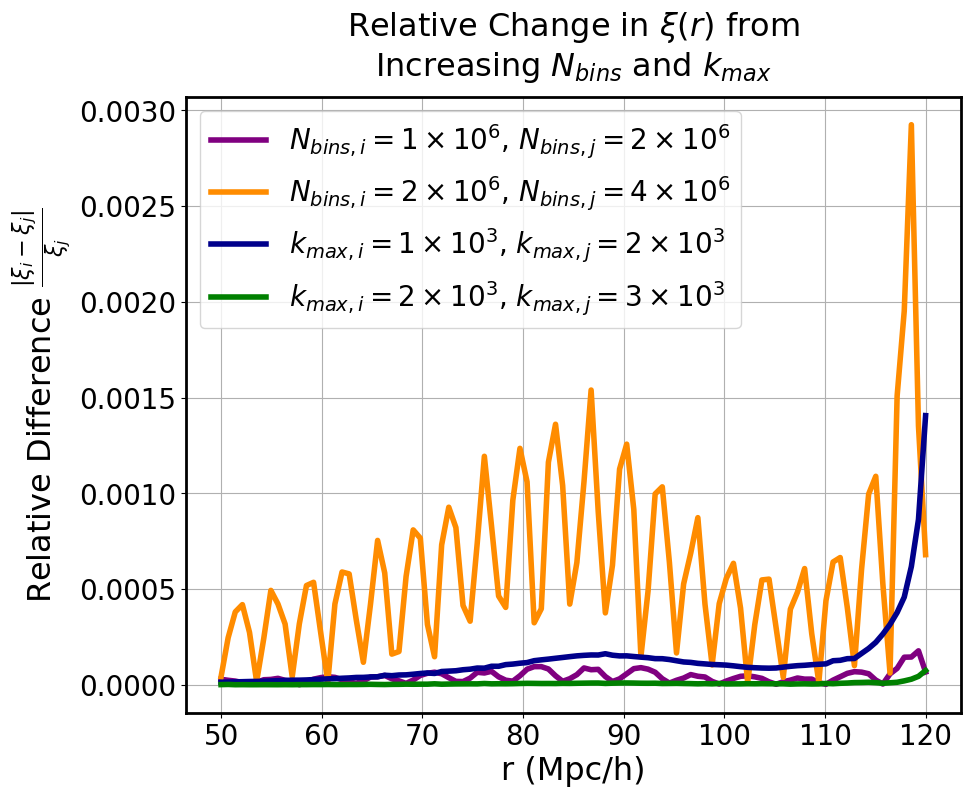

In [174]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(r_array,np.abs(c1_ - c2_)/c2_,label=r'$N_{bins,i}=1\times 10^6$, $N_{bins,j}=2\times 10^6$',lw=4,color='purple')
plt.plot(r_array,np.abs(c2_ - c3_)/c3_,label=r'$N_{bins,i}=2\times 10^6$, $N_{bins,j}=4\times 10^6$',lw=4,color='darkorange')
plt.plot(r_array,np.abs(c1 - c2)/c2,label=r'$k_{max,i}=1\times 10^3$, $k_{max,j}=2\times 10^3$',lw=4,color='darkblue')
plt.plot(r_array,np.abs(c2 - c3)/c2,label=r'$k_{max,i}=2\times 10^3$, $k_{max,j}=3\times 10^3$',lw=4,color='green')
plt.xlabel('r (Mpc/h)',fontsize=23)
plt.ylabel(r'Relative Difference $\frac{|\xi_i-\xi_j|}{\xi_j}$',fontsize=23)
plt.title(r'Relative Change in $\xi(r)$ from' + '\n' + r'Increasing $N_{bins}$ and $k_{max}$',fontsize=23,pad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True,which='both')
plt.legend(fontsize=20)
plt.savefig('./hw1_p3_relative_error.png',bbox_inches='tight')

In [168]:
correlation_function_final = correlation_func(r_array,Pk_spline,2000,int(2e6))

In [169]:
# To find the scale of the Baryon Bump, we only need to find the maximum of the correlation function in a small region, 
# which can be seen from the plot of the correlation function to be around 90 Mpc-120 Mpc

# Note that we are finding the (local) maximum of the correlation function here, which will not be identical to the max of the correlation function multiplied by r**2. 
# So, on the final plot, the max will look slightly off. This is why.

index_i = np.where(np.int32(r_array)==90)[0][0]
index_f = np.where(np.int32(r_array)==120)[0][0]

xi_bump_region = correlation_function_final[index_i-1:index_f+1]
r_bump_region = r_array[index_i-1:index_f+1]

xi_baryonbump = np.max(xi_bump_region)
index_bb = np.where(xi_bump_region==xi_baryonbump)[0][0]

r_baryonbump = r_bump_region[index_bb]
print(f'The maximum of the Baryon Bump Occurs at r = {round(r_baryonbump,3)} Mpc')

The maximum of the Baryon Bump Occurs at r = 104.444 Mpc


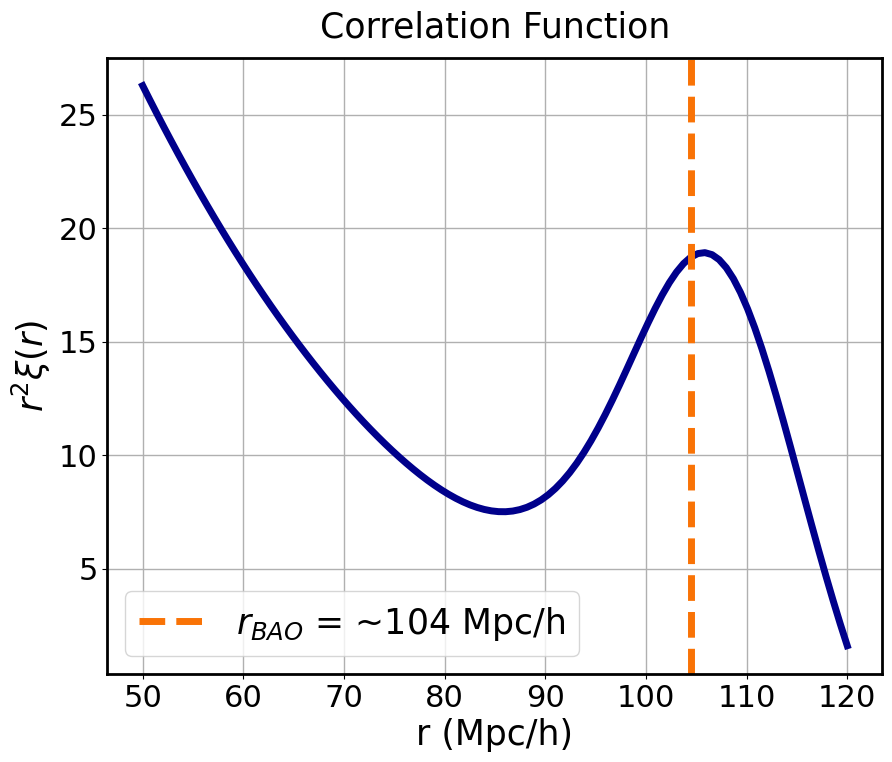

In [173]:
plt.figure(figsize=(10,8),dpi=100,linewidth=3)
plt.plot(r_array,(r_array**2)*correlation_function_final,lw=5,color='darkblue')
plt.axvline(r_baryonbump, color='#F97306', linestyle='--', linewidth=2, label=r'$r_{BAO}$' + f' = ~{round(r_baryonbump)} Mpc/h',lw=5)
plt.xlabel('r (Mpc/h)',fontsize=25)
plt.title('Correlation Function',fontsize=25,pad=15)
plt.ylabel(r'$r^{2} \xi(r)$',fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True,which='both',lw=1)
plt.legend(fontsize=25)
plt.savefig('./hw1_p3_corr_func.png')